In [74]:
data_ESG=pd.read_csv(r'/Users/yuanxiaoyang/Downloads/ICM317_Report_Part1_DataSet_2000Rows.csv')

In [76]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns                        ##visualization
import plotly.express as px
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA
from sklearn.utils import resample


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import plot_tree

from sklearn.model_selection import GridSearchCV
#metrics
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,classification_report,mean_absolute_error,mean_squared_error,r2_score
#ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [77]:
#basic inforamation
data_ESG

,FEAT_E1,FEAT_E2,FEAT_E3,FEAT_E4,FEAT_S1,FEAT_S2,FEAT_S3,FEAT_S4,FEAT_G1,FEAT_G2,FEAT_G3,FEAT_G4,FEAT_G5,FEAT_G6,FEAT_G7,FEAT_G8,CATEGORY
0,3,0.02,1,3,9,0.01,1,2,9,0.2,0.16,-0.16,0.16,GROUP_B,7,6.0,2
1,7,0.01,1,4,7,0.38,1,4,10,0.4,0.03,-0.58,0.58,GROUP_B,7,4.0,2
2,3,0.29,1,3,1,0.01,2,1,5,0.1,0.00,-0.89,0.89,GROUP_B,5,10.0,2
3,3,0.00,0,3,5,0.08,0,4,1,0.3,0.97,-0.01,0.01,GROUP_A,0,7.0,0
4,9,0.38,1,3,2,0.24,2,2,4,0.9,0.47,-0.67,0.67,GROUP_A,3,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3,0.00,2,5,4,0.79,1,2,2,0.2,0.71,0.00,0.00,GROUP_A,1,3.0,1
1996,2,0.59,1,4,1,0.86,1,5,1,0.7,0.15,-0.88,0.88,GROUP_A,0,9.0,0
1997,4,0.09,2,4,0,0.19,1,4,6,0.9,0.16,-0.52,0.52,GROUP_C,9,NaN,0
1998,0,0.33,0,3,0,0.03,0,2,7,0.8,0.02,-0.28,0.28,GROUP_A,4,8.0,0


In [78]:
data_ESG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FEAT_E1   2000 non-null   int64  
 1   FEAT_E2   2000 non-null   float64
 2   FEAT_E3   2000 non-null   int64  
 3   FEAT_E4   2000 non-null   int64  
 4   FEAT_S1   2000 non-null   int64  
 5   FEAT_S2   2000 non-null   float64
 6   FEAT_S3   2000 non-null   int64  
 7   FEAT_S4   2000 non-null   int64  
 8   FEAT_G1   2000 non-null   int64  
 9   FEAT_G2   2000 non-null   float64
 10  FEAT_G3   2000 non-null   float64
 11  FEAT_G4   2000 non-null   float64
 12  FEAT_G5   2000 non-null   float64
 13  FEAT_G6   2000 non-null   object 
 14  FEAT_G7   2000 non-null   int64  
 15  FEAT_G8   1816 non-null   float64
 16  CATEGORY  2000 non-null   int64  
dtypes: float64(7), int64(9), object(1)
memory usage: 265.8+ KB


In [79]:
data_ESG.describe().T

,count,mean,std,min,25%,50%,75%,max
FEAT_E1,2000.0,4.949000,3.221737,0.0,2.0000,5.00,8.0000,10.0
FEAT_E2,2000.0,0.345520,0.302412,0.0,0.0700,0.27,0.5900,1.0
FEAT_E3,2000.0,0.992500,0.728498,0.0,0.0000,1.00,2.0000,2.0
FEAT_E4,2000.0,3.007500,1.212509,1.0,2.0000,3.00,4.0000,5.0
FEAT_S1,2000.0,5.072000,3.136676,0.0,2.0000,5.00,8.0000,10.0
FEAT_S2,2000.0,0.333000,0.295212,0.0,0.0700,0.25,0.5700,1.0
FEAT_S3,2000.0,0.996000,0.719891,0.0,0.0000,1.00,2.0000,2.0
FEAT_S4,2000.0,2.944000,1.243236,1.0,2.0000,3.00,4.0000,5.0
FEAT_G1,2000.0,5.111500,3.117359,0.0,2.0000,5.00,8.0000,10.0
FEAT_G2,2000.0,0.504850,0.293453,0.0,0.3000,0.50,0.8000,1.0


In [80]:
#Explore columns
data_ESG.columns

Index(['FEAT_E1', 'FEAT_E2', 'FEAT_E3', 'FEAT_E4', 'FEAT_S1', 'FEAT_S2',
       'FEAT_S3', 'FEAT_S4', 'FEAT_G1', 'FEAT_G2', 'FEAT_G3', 'FEAT_G4',
       'FEAT_G5', 'FEAT_G6', 'FEAT_G7', 'FEAT_G8', 'CATEGORY'],
      dtype='object')

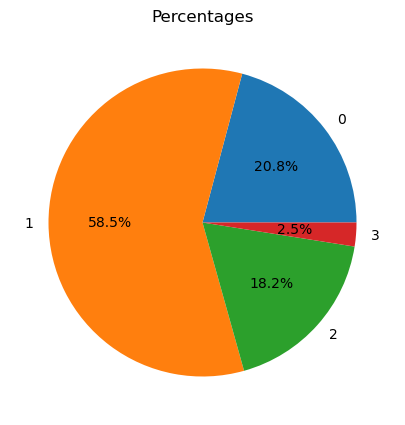

In [81]:
 
count_0=data_ESG[data_ESG['CATEGORY']==0].shape[0]
count_1=data_ESG[data_ESG['CATEGORY']==1].shape[0]
count_2=data_ESG[data_ESG['CATEGORY']==2].shape[0]
count_3=data_ESG[data_ESG['CATEGORY']==3].shape[0]

plt.figure(figsize=(10,5))
labels=['0','1','2','3']   
sizes=[count_0,count_1,count_2,count_3] 
plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.title('Percentages')  
plt.tight_layout
plt.show()    

<Axes: >

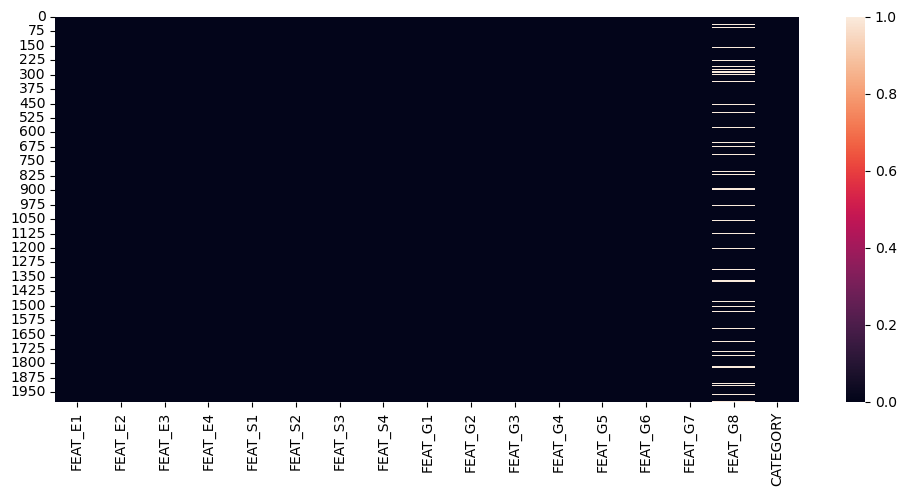

In [82]:
#check null values by graphically
plt.figure(figsize=(12,5))
sns.heatmap(data_ESG.isnull())

In [83]:
data_ESG.isnull().sum().sort_values(ascending=False)

FEAT_G8     184
FEAT_E1       0
FEAT_G2       0
FEAT_G7       0
FEAT_G6       0
FEAT_G5       0
FEAT_G4       0
FEAT_G3       0
FEAT_G1       0
FEAT_E2       0
FEAT_S4       0
FEAT_S3       0
FEAT_S2       0
FEAT_S1       0
FEAT_E4       0
FEAT_E3       0
CATEGORY      0
dtype: int64

In [84]:
#impute missing values
missing_data_cols=data_ESG.isnull().sum()[data_ESG.isnull().sum()>0].index.tolist()
print('Columns of missing values :',missing_data_cols)

Columns of missing values : ['FEAT_G8']


In [85]:
categorical_cols=[]
numeric_cols=['FEAT_G8']
bool_cols=[]

In [86]:
############     DEFINE IMPUTE MISSING VALUE FUNCTIONS
     ####  FOR CATEGORICAL TYPE
def impute_categorical_missing_data(passed_col):
    df_null=data_ESG[data_ESG[passed_col].isnull()]
    df_not_null=data_ESG[data_ESG[passed_col].notnull()]
    
    X=df_not_null.drop(passed_col,axis=1)
    y=df_not_null[passed_col]

    other_missing_cols=[col for col in missing_data_cols if col!=passed_col]

    label_encoder=LabelEncoder()

    for col in X.columns:
        if X[col].dtype=='float64' or X[col].dtype=='category':
            X[col]=label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y=label_encoder.fit_transform(y)

    iterative_imputer=IterativeImputer(estimator=RandomForestRegressor(random_state=42),add_indicator=True)
    for col in other_missing_cols:
        if X[col].isnull().sum()>0:
            col_with_missing_values =X[col].values.reshape(-1,1)
            imputed_values=iterative_imputer.fit_transform(col_with_missing_values)
            X[col]=imputed_values[:,0]
        else:
            pass

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

    rf_classifier=RandomForestClassifier()

    rf_classifier.fit(X_train,y_train)

    y_pred=rf_classifier.predict(X_test)

    acc_score=accuracy_score(y_test,y_pred)

    print("The feature ' "+passed_col+"'has been imputed with",round((acc_score*100),2),"accuracy\n")

    X=df_null.drop(passed_col,axis=1)

    for col in X.columns:
        if X[col].dtype =='object'or X[col].dtype=='category':
            X[col]=label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum()>0:
            col_with_missing_values=X[col].values.reshape(-1,1)
            imputed_values=iterative_imputer.fit_transform(col_with_missing_values)
            X[col]=imputed_values[:,0]
        else:
            pass

    if len(df_null)>0:
        df_null[passed_col]=rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col]=df_null[passed_col].map({0:False,1:True})
        else:
            pass
    else:
        pass

    df_combined =pd.concat([df_not_null,df_null])

    return df_combined[passed_col]      



In [87]:
     ####  FOR NUMERIC TYPE
def impute_continuous_missing_data(passed_col):
    
    df_null = data_ESG[data_ESG[passed_col].isnull()]
    df_not_null = data_ESG[data_ESG[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
          if X[col].dtype == 'object' or X[col].dtype == 'category':
               X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42),add_indicator=True)

    for col in other_missing_cols:
          if X[col].isnull().sum() > 0:
               col_with_missing_values = X[col].values.reshape(-1, 1)
               imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
               X[col] = imputed_values[:, 0]
          else:
                pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
           if X[col].dtype == 'object' or X[col].dtype == 'category':
                X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
            if X[col].isnull().sum() > 0:
                col_with_missing_values = X[col].values.reshape(-1, 1)
                imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
                X[col] = imputed_values[:, 0]
            else:
                pass
                
    if len(df_null) > 0: 
          df_null[passed_col] = rf_regressor.predict(X)
    else:
          pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]


In [88]:
#### IMPUTATION for dataset
for col in missing_data_cols:
    print("Missing Values:",col,"(",str(round((data_ESG[col].isnull().sum()/len(data_ESG))*100,2))+"% )")
    if col in categorical_cols:
        data_ESG[col]=impute_categorical_missing_data(col)
    elif col in numeric_cols:
        data_ESG[col]=impute_continuous_missing_data(col)
    else: 
       
        pass


Missing Values: FEAT_G8 ( 9.2% )
MAE = 2.926730769230769 

RMSE = 3.3785628731625064 

R2 = -0.09188807673536825 



In [89]:
#OUTLIERS
data_ESG=data_ESG[data_ESG['FEAT_S2']<0.945]
data_ESG=data_ESG[data_ESG['FEAT_G7']<15.50]
data_ESG
# Perform over-sampling of CATEGORY 0
df_majority = data_ESG[data_ESG['CATEGORY'] != 0]
df_minority = data_ESG[data_ESG['CATEGORY'] == 0]

# Determine the number of samples in the majority class to match
n_samples_majority = df_majority['CATEGORY'].value_counts().max()

# Upsample minority class (CATEGORY 0)
data_ESG= resample(df_minority, 
                   replace=True,      # sample with replacement
                   n_samples=n_samples_majority,  # to match majority class
                   random_state=123)  # reproducible results

# Combine majority class with upsampled minority class
data_ESG = pd.concat([df_majority, data_ESG])

# Check the new class counts
upsampled_counts = data_ESG['CATEGORY'].value_counts()
upsampled_counts



1    1102
0    1102
2     345
3      50
Name: CATEGORY, dtype: int64

In [90]:
### Encode the  categorical columns

data_ESG_train=data_ESG.copy()
le=LabelEncoder()
for col in data_ESG_train.columns:
    if data_ESG_train[col].dtypes=='object' or data_ESG_train[col].dtypes=='category':
        data_ESG_train[col]=le.fit_transform(data_ESG_train[col])

In [91]:
data_ESG_train.corr().style.format("{:.1}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,FEAT_E1,FEAT_E2,FEAT_E3,FEAT_E4,FEAT_S1,FEAT_S2,FEAT_S3,FEAT_S4,FEAT_G1,FEAT_G2,FEAT_G3,FEAT_G4,FEAT_G5,FEAT_G6,FEAT_G7,FEAT_G8,CATEGORY
FEAT_E1,1e+00,0.03,-0.05,0.05,0.06,0.002,0.04,0.01,-0.05,0.05,-0.01,0.003,-0.003,-0.01,-0.03,-0.005,-0.005
FEAT_E2,0.03,1e+00,-0.008,-0.006,0.03,-0.02,0.06,0.01,-0.008,0.03,0.02,0.05,-0.05,-0.01,0.05,0.07,-0.01
FEAT_E3,-0.05,-0.008,1e+00,0.03,0.03,-0.01,0.001,-0.03,0.01,0.03,-0.04,-0.002,0.002,-0.02,0.02,-0.07,0.02
FEAT_E4,0.05,-0.006,0.03,1e+00,-0.01,-0.004,-0.01,0.03,-0.03,0.02,0.003,0.01,-0.01,0.01,-0.01,0.03,-0.04
FEAT_S1,0.06,0.03,0.03,-0.01,1e+00,0.005,0.03,-0.01,-0.007,-0.05,0.02,0.05,-0.05,0.04,0.001,-0.05,0.3
FEAT_S2,0.002,-0.02,-0.01,-0.004,0.005,1e+00,0.007,0.008,-0.05,-0.04,0.01,0.0008,-0.0008,0.04,0.02,-0.04,-0.03
FEAT_S3,0.04,0.06,0.001,-0.01,0.03,0.007,1e+00,0.05,0.05,-0.06,0.03,-0.05,0.05,0.007,0.02,0.005,0.4
FEAT_S4,0.01,0.01,-0.03,0.03,-0.01,0.008,0.05,1e+00,-0.04,0.03,-0.02,0.0002,-0.0002,0.01,-0.03,0.01,-0.2
FEAT_G1,-0.05,-0.008,0.01,-0.03,-0.007,-0.05,0.05,-0.04,1e+00,-0.06,0.04,-0.05,0.05,-0.008,0.03,-0.04,0.5
FEAT_G2,0.05,0.03,0.03,0.02,-0.05,-0.04,-0.06,0.03,-0.06,1e+00,0.01,0.08,-0.08,0.03,0.003,-0.04,-0.4


In [92]:
#Logistic Regression（whole features）
train_set, test_set=train_test_split(data_ESG_train, test_size=0.3, random_state=42)

x_train=train_set[['FEAT_E1','FEAT_E2','FEAT_E3','FEAT_E4','FEAT_S1','FEAT_S2','FEAT_S3','FEAT_S4','FEAT_G1','FEAT_G2','FEAT_G3','FEAT_G4','FEAT_G5','FEAT_G6','FEAT_G7','FEAT_G8']]

scaler_x=StandardScaler()
scaled_x_train=scaler_x.fit_transform(x_train)

y_train=train_set['CATEGORY']


x_test=test_set[['FEAT_E1','FEAT_E2','FEAT_E3','FEAT_E4','FEAT_S1','FEAT_S2','FEAT_S3','FEAT_S4','FEAT_G1','FEAT_G2','FEAT_G3','FEAT_G4','FEAT_G5','FEAT_G6','FEAT_G7','FEAT_G8']]
scaler_x=StandardScaler()
scaled_x_test=scaler_x.fit_transform(x_test)


y_test=test_set['CATEGORY']

logistic_model=LogisticRegression()
logistic_model.fit(scaled_x_train,y_train)
y_pred_logistic=logistic_model.predict(scaled_x_test)



In [93]:
accuracy_best_logistic = accuracy_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic,average="macro")
precision_logistic = precision_score(y_test, y_pred_logistic,average='macro')
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
print("Test Accuracy:", accuracy_best_logistic)
print("F1 Score:", f1_logistic)
print("Precision Score:", precision_logistic)
print("------------------------------------------")
print("Confusion Matrix:",conf_matrix_logistic)

Test Accuracy: 0.8192307692307692
F1 Score: 0.7435617941305218
Precision Score: 0.8181731472311946
------------------------------------------
Confusion Matrix: [[300  38   0   0]
 [ 43 265  14   0]
 [  1  37  68   1]
 [  0   0   7   6]]


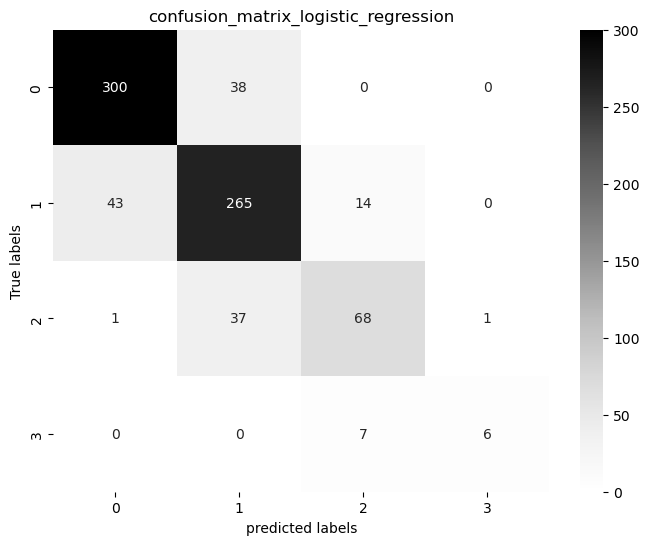

In [94]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_logistic,annot=True,cmap='Greys',fmt='g')
plt.title('confusion_matrix_logistic_regression')
plt.xlabel('predicted labels')
plt.ylabel('True labels')
plt.show()

In [95]:

coefficients = logistic_model.coef_[0]
features = x_train.columns
feature_importance = pd.DataFrame(coefficients, index=features, columns=['Coefficient'])

feature_importance['Absolute_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance_sorted = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

print(feature_importance_sorted)


         Coefficient  Absolute_Coefficient
FEAT_G1    -3.049485              3.049485
FEAT_S3    -2.285456              2.285456
FEAT_G2     2.041652              2.041652
FEAT_S4     1.744113              1.744113
FEAT_S1    -1.626725              1.626725
FEAT_G3    -1.587197              1.587197
FEAT_G4     0.801603              0.801603
FEAT_G5    -0.801603              0.801603
FEAT_G8     0.148195              0.148195
FEAT_E4    -0.082541              0.082541
FEAT_E1    -0.080566              0.080566
FEAT_S2     0.077295              0.077295
FEAT_G7     0.059985              0.059985
FEAT_G6     0.038731              0.038731
FEAT_E2     0.026505              0.026505
FEAT_E3    -0.008524              0.008524


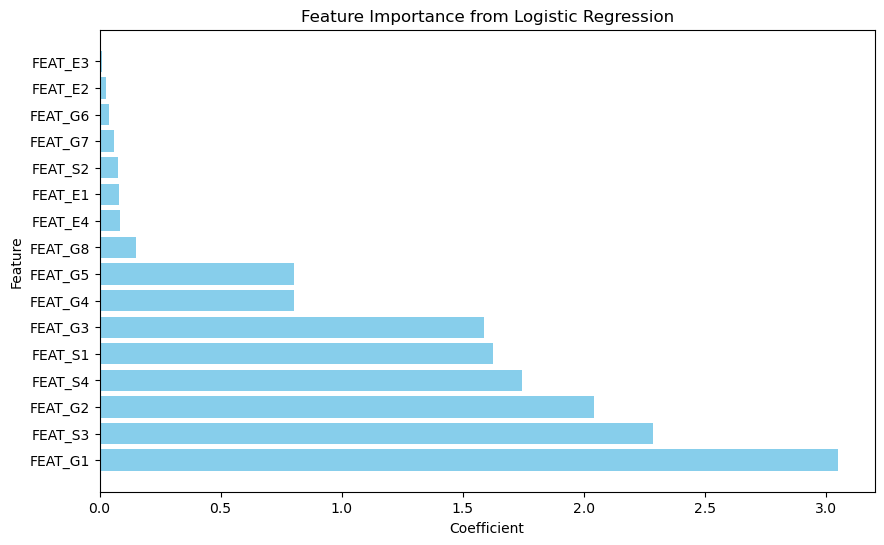

In [96]:
plt.figure(figsize=(10,6))
plt.barh(feature_importance_sorted.index, feature_importance_sorted['Absolute_Coefficient'], color='skyblue')
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

In [97]:
#Logistic Regression（top 8 features）
train_set_top8, test_set_top8=train_test_split(data_ESG_train, test_size=0.3, random_state=42)
x_train_top8=train_set[['FEAT_S1','FEAT_S3','FEAT_S4','FEAT_G1','FEAT_G2','FEAT_G3','FEAT_G4','FEAT_G5']]
scaler_x=StandardScaler()
scaled_x_train_top8=scaler_x.fit_transform(x_train_top8)

y_train_top8=train_set['CATEGORY']

x_test_top8=test_set[['FEAT_S1','FEAT_S3','FEAT_S4','FEAT_G1','FEAT_G2','FEAT_G3','FEAT_G4','FEAT_G5']]
scaler_x=StandardScaler()
scaled_x_test_top8=scaler_x.fit_transform(x_test_top8)

y_test_top8=test_set['CATEGORY']

logistic_model=LogisticRegression()
logistic_model.fit(scaled_x_train_top8,y_train_top8)
y_pred_logistic_top8=logistic_model.predict(scaled_x_test_top8)



In [98]:
accuracy_best_logistic_top8 = accuracy_score(y_test_top8, y_pred_logistic_top8)
f1_logistic_top8= f1_score(y_test_top8, y_pred_logistic_top8,average="macro")
precision_logistic_top8 = precision_score(y_test_top8, y_pred_logistic_top8,average='macro')
conf_matrix_logistic_top8 = confusion_matrix(y_test_top8, y_pred_logistic_top8)
print("Test Accuracy:", accuracy_best_logistic_top8)
print("F1 Score:", f1_logistic_top8)
print("Precision Score:", precision_logistic_top8)
print("------------------------------------------")
print("Confusion Matrix:",conf_matrix_logistic_top8)

Test Accuracy: 0.8243589743589743
F1 Score: 0.7902182396374072
Precision Score: 0.8388799672474317
------------------------------------------
Confusion Matrix: [[299  39   0   0]
 [ 40 270  12   0]
 [  1  40  65   1]
 [  0   0   4   9]]


In [99]:
# Logistic Regression（top 5 features）
train_set_top5, test_set_top5 = train_test_split(data_ESG_train, test_size=0.3, random_state=42)
x_train_top5 = train_set[['FEAT_S3','FEAT_S1','FEAT_S4','FEAT_G1','FEAT_G2']] # Top 5 features
scaler_x = StandardScaler()
scaled_x_train_top5 = scaler_x.fit_transform(x_train_top5)

y_train_top5 = train_set['CATEGORY']

x_test_top5 = test_set[['FEAT_S3','FEAT_S1','FEAT_S4','FEAT_G1','FEAT_G2']] # Top 5 features, same as in training
scaler_x = StandardScaler()
scaled_x_test_top5 = scaler_x.fit_transform(x_test_top5)

y_test_top5 = test_set['CATEGORY']

logistic_model = LogisticRegression()
logistic_model.fit(scaled_x_train_top5, y_train_top5)
y_pred_logistic_top5 = logistic_model.predict(scaled_x_test_top5)



In [100]:
accuracy_best_logistic_top5 = accuracy_score(y_test_top5, y_pred_logistic_top5)
f1_logistic_top5 = f1_score(y_test_top5, y_pred_logistic_top5, average="macro")
precision_logistic_top5 = precision_score(y_test_top5, y_pred_logistic_top5, average='macro')
conf_matrix_logistic_top5 = confusion_matrix(y_test_top5, y_pred_logistic_top5)

print("Test Accuracy:", accuracy_best_logistic_top5)
print("F1 Score:", f1_logistic_top5)
print("Precision Score:", precision_logistic_top5)
print("------------------------------------------")
print("Confusion Matrix:", conf_matrix_logistic_top5)


Test Accuracy: 0.7769230769230769
F1 Score: 0.606625273857195
Precision Score: 0.7392835820895521
------------------------------------------
Confusion Matrix: [[287  51   0   0]
 [ 44 269   9   0]
 [  4  54  48   1]
 [  0   1  10   2]]


In [101]:
# Logistic Regression（top 4 features）
train_set_top4, test_set_top4 = train_test_split(data_ESG_train, test_size=0.3, random_state=42)
x_train_top4 = train_set[['FEAT_S3','FEAT_S4','FEAT_G1','FEAT_G2']] # Top 4 features
scaler_x = StandardScaler()
scaled_x_train_top4 = scaler_x.fit_transform(x_train_top4)

y_train_top4 = train_set['CATEGORY']

x_test_top4 = test_set[['FEAT_S3','FEAT_S4','FEAT_G1','FEAT_G2']] # Top 4 features, same as in training
scaler_x = StandardScaler()
scaled_x_test_top4 = scaler_x.fit_transform(x_test_top4)

y_test_top4 = test_set['CATEGORY']

logistic_model = LogisticRegression()
logistic_model.fit(scaled_x_train_top4, y_train_top4)
y_pred_logistic_top4 = logistic_model.predict(scaled_x_test_top4)



In [102]:
accuracy_best_logistic_top4 = accuracy_score(y_test_top4, y_pred_logistic_top4)
f1_logistic_top4 = f1_score(y_test_top4, y_pred_logistic_top4, average="macro")
precision_logistic_top4 = precision_score(y_test_top4, y_pred_logistic_top4, average='macro')
conf_matrix_logistic_top4 = confusion_matrix(y_test_top4, y_pred_logistic_top4)

print("Test Accuracy:", accuracy_best_logistic_top4)
print("F1 Score:", f1_logistic_top4)
print("Precision Score:", precision_logistic_top4)
print("------------------------------------------")
print("Confusion Matrix:", conf_matrix_logistic_top4)


Test Accuracy: 0.7346153846153847
F1 Score: 0.538578167115903
Precision Score: 0.781764848265496
------------------------------------------
Confusion Matrix: [[285  53   0   0]
 [ 61 248  13   0]
 [  5  63  39   0]
 [  0   3   9   1]]


In [103]:
pca=PCA(n_components=16)
x_train_pca=pca.fit_transform(scaled_x_train)
print(pca.explained_variance_ratio_)               

[1.28945608e-01 7.48530834e-02 7.25402513e-02 7.08669822e-02
 7.01220658e-02 6.65458432e-02 6.44574011e-02 6.24676277e-02
 6.09935759e-02 5.99527552e-02 5.83656350e-02 5.41342488e-02
 5.38856340e-02 5.13397766e-02 5.05295114e-02 5.90006096e-32]


In [104]:
#Random Forest Classifier
rfc_10=RandomForestClassifier(n_estimators=10,random_state=42)
rfc_10.fit(x_train,y_train)
y_pred_rfc_10=rfc_10.predict(x_test)
print("Model accuracy score with 10 decision-trees :", accuracy_score(y_test, y_pred_rfc_10))

Model accuracy score with 10 decision-trees : 0.8538461538461538


In [105]:
rfc_100=RandomForestClassifier(n_estimators=100,random_state=42)
rfc_100.fit(x_train,y_train)
y_pred_rfc_100=rfc_100.predict(x_test)
print("Model accuracy score with 100 decision-trees :", accuracy_score(y_test, y_pred_rfc_100))

Model accuracy score with 100 decision-trees : 0.8705128205128205


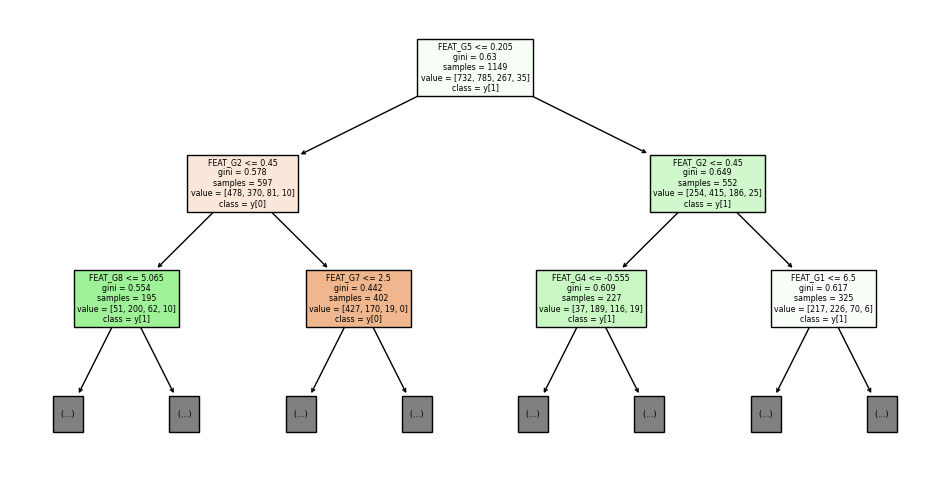

In [106]:
FirstTree=rfc_100.estimators_[0]
plt.figure(figsize=(12,6))
plot_tree(FirstTree, max_depth=2,filled=True,feature_names=x_train.columns, class_names=True)
plt.show()